# Problem 
A businessman selling his products on Meesho. Many times products get returned by the customer and most of the time products are mismatched from the original or some kind of fraud happens with the seller. In this case the seller lost his many products. If return is genuine then also he loses the packaging cost and courier cost.  Seller wants a model that predicts that order will deliver to the customer or return back. This model will work as an alert alarm for him. He also wants to know that from which state he is getting more orders and which gender is giving more orders. 
By doing EDA and making model i will try to help him in his business.

In [1]:
# Importing all the relevant libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [2]:
# Importing and showing dataset.
df = pd.read_csv('Meesho dataset.csv',skiprows=1)
df.head()

,Type,Reason for Credit Entry,Sub Order No,Order Verification Date,Order Date,Gender,Cust address,Reseller State,Product Name,SKU,...,Total Meesho commission (Incl. GST),GST on Total Meesho Commission,Delivery Charge(excl Gst),GST on delivery charges,Supplier State,TCS (IGST),TCS (0.5% CGST+0.5% SGST),Settlement Amount to Supplier,Invoice Download Link,CN Download Link
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,C,D,E,F,NaN,I,J,A+B-C-D-E-F-G-H-I-J,NaN,NaN
1,Invoice,Delivered,62397302801_1,"31 Jan, 2022","31 Jan, 2022",Male,"23/12, Karumaariyamman Nagar 5th Street, Chenn...",Tamil Nadu,Graceful Mosquito Nets,BRIJ KISHORE ENTERPRISES 077/ WHITE PRINT 7 X8,...,0,0,80.95,14.57,Bihar,4.08,0,328.4,https://s3-ap-southeast-1.amazonaws.com/meesho...,NaN
2,Invoice,Delivered,15394289172_1,"31 Jan, 2022","31 Jan, 2022",Male,"bangareddy palli, bangareddy palle village ,di...",Andhra Pradesh,Graceful Mosquito Nets,BRIJ KISHORE ENTERPRISES 077/ WHITE PRINT 7 X8,...,0,0,80.95,14.57,Bihar,4.08,0,328.4,https://s3-ap-southeast-1.amazonaws.com/meesho...,NaN
3,Invoice,Delivered,44211523410_1,"31 Jan, 2022","31 Jan, 2022",Male,"Rajiv Gandhi centre for aquaculture , Govt.of ...",Tamil Nadu,Classic Mosquito Nets,"BRIJ KISHORE ENTERPRISES , KING ( 7 FT X8 FT )...",...,0,0,80.95,14.57,Bihar,3.85,0,304.63,https://s3-ap-southeast-1.amazonaws.com/meesho...,NaN
4,Invoice,Delivered,49046876405_1,"31 Jan, 2022","31 Jan, 2022",Male,"Ranaghat Kalaighata mathpara kali temple, Rana...",West Bengal,V-Guard VIH - 101 1000 W Immersion Heater Rod ...,V-Guard VIH - 101 1000 W Immersion Heater Rod ...,...,0,0,61.86,11.13,Bihar,4.58,0,463.43,https://s3-ap-southeast-1.amazonaws.com/meesho...,NaN


In [3]:
# As we see above the 1st row is not of use, so we will drop it.
df = df.drop(0,axis=0)
df.head()

,Type,Reason for Credit Entry,Sub Order No,Order Verification Date,Order Date,Gender,Cust address,Reseller State,Product Name,SKU,...,Total Meesho commission (Incl. GST),GST on Total Meesho Commission,Delivery Charge(excl Gst),GST on delivery charges,Supplier State,TCS (IGST),TCS (0.5% CGST+0.5% SGST),Settlement Amount to Supplier,Invoice Download Link,CN Download Link
1,Invoice,Delivered,62397302801_1,"31 Jan, 2022","31 Jan, 2022",Male,"23/12, Karumaariyamman Nagar 5th Street, Chenn...",Tamil Nadu,Graceful Mosquito Nets,BRIJ KISHORE ENTERPRISES 077/ WHITE PRINT 7 X8,...,0,0,80.95,14.57,Bihar,4.08,0,328.4,https://s3-ap-southeast-1.amazonaws.com/meesho...,NaN
2,Invoice,Delivered,15394289172_1,"31 Jan, 2022","31 Jan, 2022",Male,"bangareddy palli, bangareddy palle village ,di...",Andhra Pradesh,Graceful Mosquito Nets,BRIJ KISHORE ENTERPRISES 077/ WHITE PRINT 7 X8,...,0,0,80.95,14.57,Bihar,4.08,0,328.4,https://s3-ap-southeast-1.amazonaws.com/meesho...,NaN
3,Invoice,Delivered,44211523410_1,"31 Jan, 2022","31 Jan, 2022",Male,"Rajiv Gandhi centre for aquaculture , Govt.of ...",Tamil Nadu,Classic Mosquito Nets,"BRIJ KISHORE ENTERPRISES , KING ( 7 FT X8 FT )...",...,0,0,80.95,14.57,Bihar,3.85,0,304.63,https://s3-ap-southeast-1.amazonaws.com/meesho...,NaN
4,Invoice,Delivered,49046876405_1,"31 Jan, 2022","31 Jan, 2022",Male,"Ranaghat Kalaighata mathpara kali temple, Rana...",West Bengal,V-Guard VIH - 101 1000 W Immersion Heater Rod ...,V-Guard VIH - 101 1000 W Immersion Heater Rod ...,...,0,0,61.86,11.13,Bihar,4.58,0,463.43,https://s3-ap-southeast-1.amazonaws.com/meesho...,NaN
5,Invoice,Return,76895072790_1,"31 Jan, 2022","31 Jan, 2022",Female,"J 18076, 14th Avenue,, Gaur city 2, Greater No...",Uttar Pradesh,BRIJ KISHORE ENTERPRISES FLORAL FLEECE BLANKET .,BRIJ KISHORE ENTERPRISES FLORAL FLEECE BLANKET...,...,0,0,118.1,21.26,Bihar,5.28,0,409.36,https://s3-ap-southeast-1.amazonaws.com/meesho...,NaN


In [4]:
# Checking the names of the columns
df.columns

Index(['Type', 'Reason for Credit Entry', 'Sub Order No',
       'Order Verification Date', 'Order Date', 'Gender', 'Cust address',
       'Reseller State', 'Product Name', 'SKU', 'Size', 'Quantity',
       'Product Unit Price (Incl. GST + Commission)',
       'Total Sales Amount (Incl. GST + Commission)',
       'Discount to Reseller (Incl GST and Commision)',
       'Net Sales Amount(Incl GST + Commision)',
       'Delivery Revenue (Incl. of GST)', 'GST% on Product Price and Delivery',
       'Product Taxable Value ', 'Delivery Taxable Value ',
       'GST Payable on Product', 'GST Payable on Delivery',
       'Total Meesho commission (Incl. GST)', 'GST on Total Meesho Commission',
       'Delivery Charge(excl Gst)', 'GST on delivery charges',
       'Supplier State', 'TCS (IGST)', 'TCS (0.5% CGST+0.5% SGST)',
       'Settlement Amount to Supplier', 'Invoice Download Link',
       'CN Download Link'],
      dtype='object')

# Data Cleaning

In [5]:
df.duplicated('Sub Order No').sum()

58

In [6]:
#Sub order no is the unique value in the dataset and if we check duplicates in the dataset it's showing. we need to drop the duplicates value.
df.drop_duplicates(subset='Sub Order No',keep='first',inplace=True)
df.duplicated('Sub Order No').sum()

0

In [7]:
# All the columns are not of use, so we will drop irrelevant column or the column that are same.
df_clean1 = df.drop(['Type','Sub Order No','Order Verification Date', 'Order Date','Cust address', 'Invoice Download Link',
       'CN Download Link','SKU','Total Sales Amount (Incl. GST + Commission)','Net Sales Amount(Incl GST + Commision)',
                    'Net Sales Amount(Incl GST + Commision)','Delivery Revenue (Incl. of GST)','GST% on Product Price and Delivery',
                   'Supplier State','GST Payable on Product','GST Payable on Delivery','Total Meesho commission (Incl. GST)',
                   'GST on Total Meesho Commission','Product Taxable Value ','Delivery Taxable Value ',
                   'Delivery Charge(excl Gst)','GST on delivery charges','TCS (IGST)','TCS (0.5% CGST+0.5% SGST)',
                  'Settlement Amount to Supplier' ],axis=1)
df_clean1.head(5)

,Reason for Credit Entry,Gender,Reseller State,Product Name,Size,Quantity,Product Unit Price (Incl. GST + Commission),Discount to Reseller (Incl GST and Commision)
1,Delivered,Male,Tamil Nadu,Graceful Mosquito Nets,Free Size,1.0,343,0
2,Delivered,Male,Andhra Pradesh,Graceful Mosquito Nets,Free Size,1.0,343,0
3,Delivered,Male,Tamil Nadu,Classic Mosquito Nets,Free Size,1.0,319,0
4,Delivered,Male,West Bengal,V-Guard VIH - 101 1000 W Immersion Heater Rod ...,Free Size,1.0,468,0
5,Return,Female,Uttar Pradesh,BRIJ KISHORE ENTERPRISES FLORAL FLEECE BLANKET .,Single,1.0,430,0


In [8]:
#Changing the name of two column
df_clean = df_clean1.rename(index=str,columns={'Product Unit Price (Incl. GST + Commission)':'cost','Discount to Reseller (Incl GST and Commision)':'discount'})

In [9]:
# Getting the information of data and its type
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1592 entries, 1 to 1650
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Reason for Credit Entry  1592 non-null   object 
 1   Gender                   1592 non-null   object 
 2   Reseller State           1592 non-null   object 
 3   Product Name             1592 non-null   object 
 4   Size                     1592 non-null   object 
 5   Quantity                 1592 non-null   float64
 6   cost                     1592 non-null   object 
 7   discount                 1592 non-null   object 
dtypes: float64(1), object(7)
memory usage: 111.9+ KB


In [10]:
# As we see above Price and Discount are float value but showing it as object. Now we convert it into float.
df_clean['cost'] = df_clean['cost'].astype(float)
df_clean['discount'] = df_clean['discount'].astype(float)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1592 entries, 1 to 1650
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Reason for Credit Entry  1592 non-null   object 
 1   Gender                   1592 non-null   object 
 2   Reseller State           1592 non-null   object 
 3   Product Name             1592 non-null   object 
 4   Size                     1592 non-null   object 
 5   Quantity                 1592 non-null   float64
 6   cost                     1592 non-null   float64
 7   discount                 1592 non-null   float64
dtypes: float64(3), object(5)
memory usage: 111.9+ KB


In [11]:
# All object value converted into float value.
# Now we will calculate the total amount earn by seller.
df_clean.sum(axis=0)

Reason for Credit Entry    DeliveredDeliveredDeliveredDeliveredReturnDeli...
Gender                     MaleMaleMaleMaleFemaleFemaleMaleFemaleMaleFema...
Reseller State             Tamil NaduAndhra PradeshTamil NaduWest BengalU...
Product Name               Graceful Mosquito NetsGraceful Mosquito NetsCl...
Size                       Free SizeFree SizeFree SizeFree SizeSingleFree...
Quantity                                                              1627.0
cost                                                                443429.0
discount                                                              3620.0
dtype: object

# Obsevation
Total 1627 quantity sold by seller and earn Rs 443429.0

In [12]:
# Checking the null value in the observation.
df_clean.isnull().sum()

Reason for Credit Entry    0
Gender                     0
Reseller State             0
Product Name               0
Size                       0
Quantity                   0
cost                       0
discount                   0
dtype: int64

# Observation
There is no null value present in the data.

In [13]:
df_clean.describe()

,Quantity,cost,discount
count,1592.000000,1592.000000,1592.000000
mean,1.021985,278.535804,2.273869
std,0.181187,110.050762,18.384513
min,1.000000,63.000000,0.000000
25%,1.000000,210.750000,0.000000
50%,1.000000,257.000000,0.000000
75%,1.000000,343.000000,0.000000
max,5.000000,1919.000000,357.000000


In [14]:
# Here we check outliers in Product unit price section
Right_outliers = 278.535+3*110.050 #Mean+3*std
Left_outliers = 278.535-3*110.050 #Mean-3*std
print(Right_outliers)
print(Left_outliers)
df_clean[(df_clean['cost']>Right_outliers) | (df_clean['cost']<Left_outliers)]

608.685
-51.61499999999995


,Reason for Credit Entry,Gender,Reseller State,Product Name,Size,Quantity,cost,discount
20,Return,Male,Rajasthan,JOCKEY VEST,M,1.0,763.0,0.0
22,Return,Male,Rajasthan,JOCKEY VEST,L,1.0,763.0,0.0
35,Return,Male,Gujarat,JOCKEY PRINT BRIEFS,M,1.0,725.0,0.0
55,Delivered,Male,Assam,JOCKEY AM81 TRUE BLACK MEL TEE,M,1.0,658.0,0.0
60,Return,Male,Uttar Pradesh,Mamy Poko Pants Extra Absorb Diaper pants,Free Size,1.0,629.0,0.0
62,Delivered,Male,Rajasthan,Mamy Poko Pants Extra Absorb Diaper pants,Free Size,1.0,629.0,0.0
70,Delivered,Female,Himachal Pradesh,Mamy Poko Pants Extra Absorb Diaper pants,Free Size,1.0,629.0,0.0
73,Delivered,Female,Tamil Nadu,Mamy Poko Pants Extra Absorb Diaper pants,Free Size,1.0,629.0,0.0
502,Delivered,Male,Maharashtra,SWISS TRUNK ( XL 95 ) PO5,XL,1.0,720.0,0.0
533,Return,Female,Odisha,brij kishore enterprises mink single size bla...,Free Size,1.0,632.0,53.0


# Observation
Here we found some outliers but we are not going to drop it beacause it is will play an important role in finding our target.

# Data Visualization

Delivered    1488
Return        104
Name: Reason for Credit Entry, dtype: int64


E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


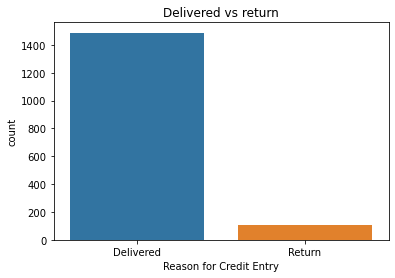

In [15]:
#First we will check the number products delivered and number of return.
print(df['Reason for Credit Entry'].value_counts())
sns.countplot('Reason for Credit Entry',data=df_clean)
plt.title('Delivered vs return')
plt.show()

# Observation 
Data set is not balanced, Number delivered is very high as respect to return.

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


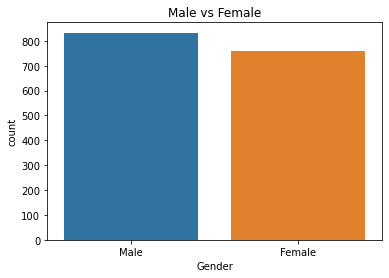

Male      833
Female    759
Name: Gender, dtype: int64

In [16]:
# Checking the data on gender basis 
sns.countplot('Gender',data =df)
plt.title('Male vs Female')
plt.show()
df['Gender'].value_counts()

# Observation
Both gender participating almost equally in the online shopping

In [17]:
#Checking the count of unique value in product name
print(df_clean['Product Name'].value_counts().to_string())

Fancy Mosquito Nets                                                                 305
AMBI ENTERPRISES Cotton Queen (6ft x 7ft) size soft Mosquito net.                   285
Trendy Mosquito Net                                                                 237
Graceful Mosquito Nets                                                              147
Fancy Mosquito Net                                                                  119
Polyurethane Face Mask                                                               53
Designer Mosquito Net                                                                44
BRIJ KISHORE ENTERPRISES FLORAL FLEECE BLANKET .                                     25
V-Guard VIH - 101 1000 W Immersion Heater Rod  (Water)Water Heaters & Geysers        22
Classic Mosquito Nets                                                                21
BRIJ KISHORE ENTERPRISES SINGLE SIZE COTTON MOSQUITO NET.                            18
Essential Mosquito Nets         

# Observation
As wee similar products are mentioned with different type so we can reduce the name making it same

In [18]:
df_clean['Product Name'].replace({'Fancy Mosquito Nets':'net','Trendy Mosquito Net':'net','Graceful Mosquito Nets':'net','BRIJ KISHORE ENTERPRISES KING SIZE COTTON MOSQUITO NET.':'net','BRIJ KISHORE ENTERPRISES KING SIZE MOSQUITO NET.':'net','V-Guard VIH - 151 1500 W Immersion Heater Rod (Water)':'Water rod','Dohar / Quilt / Blanket Double Bed Cove.':'Blanket',
                                  'Fancy Mosquito Net':'net','AMBI ENTERPRISES Single size (5ft x 7ft) cotton Mosquito net.':'net','BRIJ KISHORE ENTERPRISES SINGLE SIZE COTTON MOSQUITO NET.':'net','BRIJ KISHORE ENTERPRISES COTTON KING SIZE MOSQUITO NET.':'net','Pendant Mangalsutra':'Mangalsutra','Mangal sutra':'Mangalsutra','Dohar / Quilt / Blanket Cover':'Blanket',
                                  'Classic Mosquito Nets':'net','BRIJ KISHORE ENTERPRISES COTTON ( 6 FT X 7FT ) MOSQUITO NET.':'net','BRIJ KISHORE ENTERPRISES NYLON SINGLE ( 5 FT X 7 FT ) SIZE NO.1 MOSQUITO NET.':'net','Classy Mosquito Nets':'Designer Mosquito Net','B.K.ENTERPRISES _M702_ Mangalsutras':'Mangalsutra','B.K.ENTERPRISES _M302_ Mangalsutras':'Mangalsutra',
                                  'AMBI ENTERPRISES Queen size (6ft x 7ft) soft print cotton mosquito net.':'net','AMBI ENTERPRISES Queen size (6ft x 7ft) 703 pink print soft cotton mosquito net.':'net','AMBI ENTERPRISES Single size (4ft x 6ft) 703 print soft cotton mosquito net.':'net','Attractive Mosquito Nets':'Designer Mosquito Net','MONTE CARLO BLANKETS':'Blanket',
                                  'AMBI ENTERPRISES Single size (5ft X 7ft) Nylon NO.1 mosquito net.':'net','AMBI ENTERPRISES Cotton Mosquito net Single size (5ft x 7ft) Soft Green':'net','AMBI ENTERPRISES Fleece Blankets  Check pattern Single size (5 X 7)ft. PO5.':'net','Stylo Mosquito Nets':'Designer Mosquito Net','New Collections Of Mosquito Nets':'Designer Mosquito Net',
                                  'AMBI ENTERPRISES Single size (5ft X 7ft) Nylon NO.1 mosquito net.':'net','AMBI ENTERPRISES Cotton Mosquito net Single size (5ft x 7ft) Soft Green':'net','AMBI ENTERPRISES Fleece Blankets  Check pattern Single size (5 X 7)ft. PO5.':'net','MANGALSUTRA SET':'Mangalsutra','Mink Blanket Single Size':'Blanket',
                                  'BRIJ KISHORE ENTERPRISES QUEEN SIZE MOSQUITO NET.':'net','Designer Mosquito Nets':'Designer Mosquito Net','PENDANT  MANGALSUTRA':'Manglsutra','AMBI ENTERPRISES Cotton 077 King (7ft x 8ft) size Mosquito net.':'net','BRIJ KISHORE ENTERPRISES COTTON MOSQUITO NET.':'net','AMBI ENTERPRISES Cotton Mosquito net Single size (5ft x 7ft) Soft White':'Designer Mosquito Net',
                                  'Essential Mosquito Nets':'Designer Mosquito Net','Useful Mosquito Net':'Designer Mosquito Net','Modern Mosquito Nets':'Designer Mosquito Net','Fabulous Mosquito Net':'Designer Mosquito Net','brij kishore enterprises mink single size  blanket.':'Blanket','BRIJ KISHORE ENTERPRISES FLEECE P05 POLO SINGLE BLANKET.':'Blanket',
                                  'Trendy Mosquito Nets':'Designer Mosquito Net','Useful Mosquito Nets':'Designer Mosquito Net','BRIJ KISHORE ENTERPRISES FLORAL FLEECE BLANKET .':'Blanket','AMBI ENTERPRISES FLEECE SINGLE SIZE BLANKETS ':'Blanket','AMBI ENTERPRISES BABY MOSQUITO NET':'Baby Mosquito Net','Mamy Poko Pants  Extra Absorb  Diaper pants':'Diaper',
                                  'AMBI ENTERPRISES Cotton Queen (6ft x 7ft) size soft Mosquito net.':'net','V-Guard VIH - 101 1000 W Immersion Heater Rod  (Water)Water Heaters & Geysers ':'Water rod','BRIJ KISHORE ENTERPRISES COTTON SINGLE SIZE MOSQUITO NET.':'net','Mamy Poko Pants Extra Absorb Diaper pants':'Diaper',
                                 'V-Guard VIH - 101 1000 W Immersion Heater Rod  (Water)':'Water rod','PENDAI BUTTI JEWELLERY SET':'Butti set','Pendai Butti Set':'Butti set','Manglsutra':'Mangalsutra','LYRA 211 ( L ) Briefs ':'Panty','LYRA 211 BRIEF / PANTY':'Panty','SOFTLINE  PLAIN PANTY':'Panty',
                                 'WOOLLEN HEAD AND NECK CAP / BEANIES (BALACLAVA CAP) ':'Beanie cap','AMBI ENTERPRISES WOOLLEN HEAD AND NECK CAP / BEANIES (BALACLAVA CAP)':'Beanie cap','B. K. ENTERPRISES  WOOLLEN HEAD AND NECK CAP / BEANIES ( BALACLAVA CAP )':'Beanie cap'},inplace = True)
df_clean['Product Name'].replace({'net':'Mosquito net'},inplace=True)

In [19]:
print(df_clean['Product Name'].value_counts().to_string())

Mosquito net                                                  1219
Designer Mosquito Net                                          129
Blanket                                                         55
Polyurethane Face Mask                                          53
Water rod                                                       32
Mangalsutra                                                     22
Baby Mosquito Net                                               21
Beanie cap                                                      10
Diaper                                                           9
Panty                                                            6
DIXCY SCOTT VICTOR DURBY VEST                                    5
Butti set                                                        4
MILTON OSCAR PET 1000ML BOTTLE PO6 Wonderful Water Bottles       4
AMBI ENTERPRISES Jhumki Earrings Pack of 12 pairs.               4
JOCKEY TOP WEAR CHARCOAL FULL SLEVE THERMAL.                  

# Obsevation
Now number of features reduced beacause we make similar products in same categories.

In [20]:
# To check most number of return of particular product
return_product = df_clean[df_clean['Reason for Credit Entry']=='Return'].groupby(['Product Name','Gender']).size().reset_index().rename(columns={0:'counts'})
print(return_product)

                     Product Name  Gender  counts
0               Baby Mosquito Net  Female       1
1               Baby Mosquito Net    Male       1
2                      Beanie cap    Male       1
3                         Blanket  Female       3
4                         Blanket    Male       4
5                       Butti set  Female       1
6   DIXCY SCOTT VICTOR DURBY VEST    Male       2
7           Designer Mosquito Net  Female       4
8           Designer Mosquito Net    Male       4
9                          Diaper    Male       1
10           JOCKEY PRINT  BRIEFS    Male       1
11                    JOCKEY VEST    Male       2
12         MACROMAN PRINTED TRUNK    Male       1
13                    Mangalsutra    Male       1
14                   Mosquito net  Female      29
15                   Mosquito net    Male      45
16                          Panty    Male       1
17                      Water rod  Female       1
18                      Water rod    Male       1


# Observation
As we see above table it shown that maximum number of product returned and also check it by gender wise.

In [70]:
# Visualisation of return product with graph
graph_returned = px.bar(return_product,x='Product Name',y='counts',color='Gender')
graph_returned.show()

In [22]:
df_clean.head()

,Reason for Credit Entry,Gender,Reseller State,Product Name,Size,Quantity,cost,discount
1,Delivered,Male,Tamil Nadu,Mosquito net,Free Size,1.0,343.0,0.0
2,Delivered,Male,Andhra Pradesh,Mosquito net,Free Size,1.0,343.0,0.0
3,Delivered,Male,Tamil Nadu,Mosquito net,Free Size,1.0,319.0,0.0
4,Delivered,Male,West Bengal,Water rod,Free Size,1.0,468.0,0.0
5,Return,Female,Uttar Pradesh,Blanket,Single,1.0,430.0,0.0


# Handling categorical values
Model deals only with numerical values not with categorical values.
We need to change Reason for credit entry, State,Product name, Size and gender into numerical values

In [23]:
#Checking values for state in data
print(df_clean['Reseller State'].value_counts())

Tamil Nadu                     208
Karnataka                      160
Maharashtra                    130
West Bengal                    117
Andhra Pradesh                 111
Assam                          103
Uttar Pradesh                   97
Telangana                       93
Kerala                          85
Bihar                           82
Odisha                          72
Chhattisgarh                    42
Jharkhand                       36
Delhi                           33
Arunachal Pradesh               29
Madhya Pradesh                  25
Gujarat                         24
Rajasthan                       24
Tripura                         21
Meghalaya                       18
Manipur                         13
Andaman and Nicobar Islands     11
Goa                             11
Puducherry                      10
Mizoram                          7
Jammu & Kashmir                  7
Punjab                           7
Haryana                          6
Nagaland            

In [24]:
#We use Frequency coding to encode Reseller state
State_map = df_clean['Reseller State'].value_counts().to_dict()
df_clean['Reseller State'] = df_clean['Reseller State'].map(State_map)

In [25]:
# With one hot encoding we deal gender
df_clean['Gender'] = pd.get_dummies(df_clean['Gender'],drop_first = True)

In [26]:
#With label encoder we can change Reason for credit entry
Le = LabelEncoder()
df_clean['Reason for Credit Entry'] = Le.fit_transform(df_clean['Reason for Credit Entry'])

In [27]:
df_clean['Size'].value_counts()

Free Size    1534
Single         31
M              10
L              10
S               2
XL              2
34              1
30B             1
32B             1
Name: Size, dtype: int64

In [28]:
# Category for Size is not high so i prefer one hot encoding for it
dummy = pd.get_dummies(df_clean['Size'],drop_first = True)
df_clean = pd.concat([df_clean,dummy],axis=1)
df_clean = df_clean.drop(['Size'],axis=1)
df_clean.head()

,Reason for Credit Entry,Gender,Reseller State,Product Name,Quantity,cost,discount,32B,34,Free Size,L,M,S,Single,XL
1,0,1,208,Mosquito net,1.0,343.0,0.0,0,0,1,0,0,0,0,0
2,0,1,111,Mosquito net,1.0,343.0,0.0,0,0,1,0,0,0,0,0
3,0,1,208,Mosquito net,1.0,319.0,0.0,0,0,1,0,0,0,0,0
4,0,1,117,Water rod,1.0,468.0,0.0,0,0,1,0,0,0,0,0
5,1,0,97,Blanket,1.0,430.0,0.0,0,0,0,0,0,0,1,0


In [29]:
# For Product name i am choosing mean ordinal encoding
mean_ordinal = df_clean.groupby('Product Name')['Reason for Credit Entry'].mean().to_dict()
df_clean['Product Name'] = df_clean['Product Name'].map(mean_ordinal)
df_clean.head()

,Reason for Credit Entry,Gender,Reseller State,Product Name,Quantity,cost,discount,32B,34,Free Size,L,M,S,Single,XL
1,0,1,208,0.060705,1.0,343.0,0.0,0,0,1,0,0,0,0,0
2,0,1,111,0.060705,1.0,343.0,0.0,0,0,1,0,0,0,0,0
3,0,1,208,0.060705,1.0,319.0,0.0,0,0,1,0,0,0,0,0
4,0,1,117,0.062500,1.0,468.0,0.0,0,0,1,0,0,0,0,0
5,1,0,97,0.127273,1.0,430.0,0.0,0,0,0,0,0,0,1,0


# Observation
Now all categorical data changed into ordinal data

# Data Selection
Selecting data target and independent variable and also spliting data for train and test

In [30]:
y = df_clean.iloc[:,0] #DEPENDENT variable
x = df_clean.iloc[:,1:] #DEPENDENT variable

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,shuffle=True,random_state=10)
x_train

,Gender,Reseller State,Product Name,Quantity,cost,discount,32B,34,Free Size,L,M,S,Single,XL
311,1,97,0.127273,1.0,430.0,0.0,0,0,0,0,0,0,1,0
1451,0,85,0.060705,1.0,125.0,0.0,0,0,1,0,0,0,0,0
1242,1,208,0.060705,1.0,318.0,0.0,0,0,1,0,0,0,0,0
256,0,25,0.060705,1.0,257.0,0.0,0,0,1,0,0,0,0,0
789,0,18,0.062016,1.0,259.0,0.0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1442,1,72,0.045455,1.0,80.0,0.0,0,0,1,0,0,0,0,0
1393,1,18,0.060705,1.0,301.0,0.0,0,0,1,0,0,0,0,0
548,0,25,0.062016,1.0,246.0,0.0,0,0,1,0,0,0,0,0
1185,1,160,0.062016,1.0,285.0,0.0,0,0,1,0,0,0,0,0


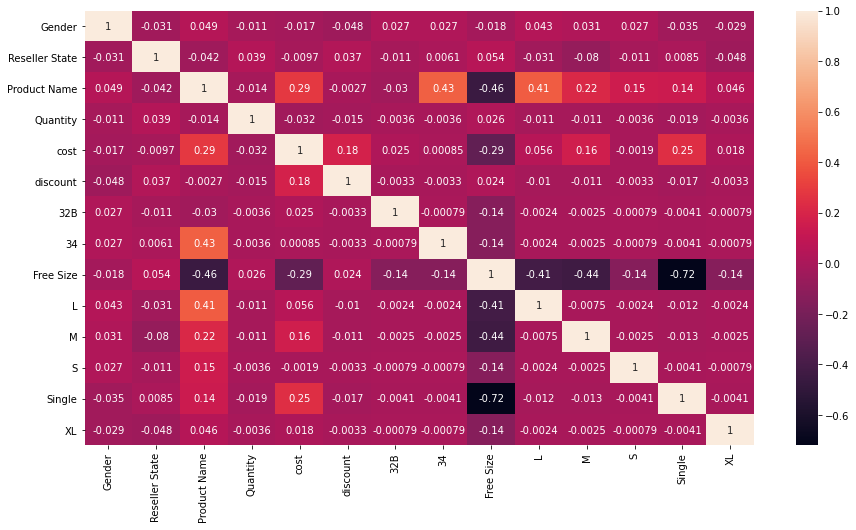

In [32]:
# Correlation of each features
f,ax = plt.subplots(figsize=(15, 8))
sns.heatmap(x_train.corr(),annot=True, ax=ax)
plt.show()

# Observation
features are not highly correlated so no need to drop any feature.

# Model prepration
Data set is imbalanced so i am choosing random forest classsifier

In [33]:
classifier = RandomForestClassifier()

In [34]:
parameter = {'n_estimators':[10,20,30,40,50,80,90,100,120,140,150,160],'criterion':['gini','entropy']}

In [35]:
cv = KFold(n_splits = 15,shuffle=True,random_state=10)

In [36]:
grid_search = GridSearchCV(classifier,parameter,cv=cv,scoring='accuracy')

In [37]:
clf = grid_search.fit(x_train,y_train)

In [38]:
clf.best_score_

0.9261811391223156

In [39]:
clf.best_params_

{'criterion': 'gini', 'n_estimators': 160}

In [40]:
# score = cross_val_score(clf,x_train,y_train,cv=cv)
# print(score)
# print(score.mean)

In [41]:
y_pred = clf.predict(x_test)
print(np.unique(y_test,return_counts = True))
print(np.unique(y_pred,return_counts = True))

(array([0, 1]), array([297,  22], dtype=int64))
(array([0, 1]), array([315,   4], dtype=int64))


In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9247648902821317

In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[294,   3],
       [ 21,   1]], dtype=int64)

In [44]:
cf = classification_report(y_test,y_pred)
print(cf)

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       297
           1       0.25      0.05      0.08        22

    accuracy                           0.92       319
   macro avg       0.59      0.52      0.52       319
weighted avg       0.89      0.92      0.90       319



# Observation:
By doing all hyperparameter tuning the training accuracy is fixed between 91%-92%. As we see testing accuracy is somewhere 
around 91%-92% but precision rate is high. Model is predicting more false positive. Which means model is predicting that items will
delivered and actually it is not deliver. So we need to work more so that precision accuracy improve.
Now i will try undersampling technique because our data set is imbalance. After that if accuracy will not improved then try
some other machine learning technique.

In [45]:
#Installing package imbalanced-learn that help in balancing our dataset.
!pip install imbalanced-learn

In [46]:
#Trying to fix the balancing issue by balance the dataset. Small category data will become 80% of large category dataset.
from imblearn.under_sampling import NearMiss
ns=NearMiss(0.8)
x_train_underbal,y_train_underbal= ns.fit_resample(x_train,y_train)
print(np.unique(y_train_underbal,return_counts = True))

(array([0, 1]), array([102,  82], dtype=int64))


E:\Anaconda\lib\site-packages\imblearn\utils\_validation.py:586: FutureWarning:

Pass sampling_strategy=0.8 as keyword args. From version 0.9 passing these as positional arguments will result in an error



In [47]:
# Now, we will continue all process that we done earlier to check accuracy. Parameters are same only dataset with balance are used.
clf_underbal = grid_search.fit(x_train_underbal,y_train_underbal)

In [48]:
print(clf_underbal.best_score_)
print(clf_underbal.best_params_)

0.8294871794871795
{'criterion': 'gini', 'n_estimators': 50}


In [49]:
y_pred_underbal = clf_underbal.predict(x_test)
accuracy_score(y_test,y_pred_underbal)

0.2852664576802508

# Observation:
With undersampling data is showing bias-variance tradeoff. Both training accuracy and testing accuracy is low. If we
compare it with Random forest classifier under sampling model really performed bad.
Now we will try over sampling and check the accuracy.

In [50]:
# Using over sampling to increase the minority class data by adding some synthetic data points.
from imblearn.over_sampling import RandomOverSampler
os = RandomOverSampler(0.5)
x_train_overbal,y_train_overbal = os.fit_resample(x_train,y_train)
print(np.unique(y_train_overbal,return_counts = True))

(array([0, 1]), array([1191,  595], dtype=int64))


E:\Anaconda\lib\site-packages\imblearn\utils\_validation.py:586: FutureWarning:

Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error



In [51]:
# Now, we will continue all process that we done earlier to check accuracy. Parameters are same only dataset with balance are used.
clf_overbal = grid_search.fit(x_train_overbal,y_train_overbal)

In [52]:
print(clf_overbal.best_score_)
print(clf_overbal.best_params_)

0.9188235294117649
{'criterion': 'gini', 'n_estimators': 120}


In [53]:
y_pred_overbal = clf_overbal.predict(x_test)
accuracy_score(y_test,y_pred_overbal)

0.8495297805642633

# Observstion:
Well it worked better with (0.5), if value range increase or decrease model highly overfitted.
Both testing and training accuracy is better than undersampling but not much better than Random forest classifier without
sampling. 
Now we can apply over sample and under sample dataset with other classifier to check best classifier for the model.

# other model
As we seen above after doing all hypertunning and balancing data set but precision not improved.
Now we will try some other method to get better result.

In [54]:
x_train.head()

,Gender,Reseller State,Product Name,Quantity,cost,discount,32B,34,Free Size,L,M,S,Single,XL
311,1,97,0.127273,1.0,430.0,0.0,0,0,0,0,0,0,1,0
1451,0,85,0.060705,1.0,125.0,0.0,0,0,1,0,0,0,0,0
1242,1,208,0.060705,1.0,318.0,0.0,0,0,1,0,0,0,0,0
256,0,25,0.060705,1.0,257.0,0.0,0,0,1,0,0,0,0,0
789,0,18,0.062016,1.0,259.0,0.0,0,0,1,0,0,0,0,0


In [55]:
# Standarising reseller state and cost for better accuracy
sc = StandardScaler()
x_train_std = x_train.copy()
columns = ['Reseller State','cost']
std_col = x_train_std[columns]
standard = sc.fit_transform(std_col.values)
x_train_std[columns] = standard

x_test_std = x_test.copy()
columns = ['Reseller State','cost']
std_test_col = x_test_std[columns]
standard = sc.transform(std_test_col.values)
x_test_std[columns] = standard

# Model Prepration:
We try logistics regression, It is more suitable when target is binary.

In [56]:
classifier2 = LogisticRegression()

In [57]:
parameter = {'penalty':['l1','l2']}
grid_search = GridSearchCV(classifier2,parameter,cv=cv,scoring='accuracy')
clf2 = grid_search.fit(x_train,y_train)

E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814:

In [58]:
clf2.best_score_

0.9379551820728291

In [59]:
clf2.best_params_

{'penalty': 'l2'}

In [60]:
y_pred_clf2 = clf2.predict(x_test)
print(np.unique(y_test,return_counts = True))
print(np.unique(y_pred_clf2,return_counts = True))

(array([0, 1]), array([297,  22], dtype=int64))
(array([0]), array([319], dtype=int64))


In [61]:
accuracy_score(y_test,y_pred_clf2)

0.9310344827586207

In [62]:
confusion_matrix(y_test,y_pred_clf2)

array([[297,   0],
       [ 22,   0]], dtype=int64)

# Same with standarised data set

In [63]:
parameter = {'penalty':['l1','l2']}
grid_search = GridSearchCV(classifier2,parameter,cv=cv,scoring='accuracy')
clf2_std = grid_search.fit(x_train_std,y_train)

E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814:

In [64]:
y_pred_clf2_std = clf2.predict(x_test_std)
print(clf2_std.best_score_)
print(clf2_std.best_params_)
print(accuracy_score(y_test,y_pred_clf2_std))

0.9371615312791783
{'penalty': 'l2'}
0.9310344827586207


In [65]:
confusion_matrix(y_test,y_pred_clf2_std)

array([[297,   0],
       [ 22,   0]], dtype=int64)

# Observation:
With or without standarising the data score with logistic regression is same.
Problem of false positive is still not solved with logistics regression

# Model prepration
Checking result with support vector Classifier

In [66]:
# Training and testing data with SVC
classifier3 = SVC()
parameter = {'kernel' : ['linear', 'poly', 'rbf', 'sigmoid']}
grid_search = GridSearchCV(classifier3,parameter,cv=cv,scoring='accuracy')
clf3 = grid_search.fit(x_train_std,y_train)

In [67]:
y_pred_clf3 = clf3.predict(x_test_std)
print(clf3.best_score_)
print(clf3.best_params_)
print(accuracy_score(y_test,y_pred_clf3))
print(confusion_matrix(y_test,y_pred_clf3))

0.9355929038281979
{'kernel': 'linear'}
0.9310344827586207
[[297   0]
 [ 22   0]]


# Observation:
Precision problem is still not solved with SVC. Accuracy is almost same but precision rate is not improved.

In [68]:
# Using Undersample dataset with svc.
clf3_underbal = grid_search.fit(x_train_underbal,y_train_underbal)
y_pred_clf3_underbal = clf3_underbal.predict(x_test)
print(clf3_underbal.best_score_)
print(clf3_underbal.best_params_)
print(accuracy_score(y_test,y_pred_clf3_underbal))
print(confusion_matrix(y_test,y_pred_clf3_underbal))

0.7205128205128205
{'kernel': 'poly'}
0.5266457680250783
[[159 138]
 [ 13   9]]


# Observation:
Again with undersampling dataset show bias-variance tradeoff. Model is not good to use for prediction.

In [ ]:
# using Oversample dataset for model prediction with SVC
clf3_overbal = grid_search.fit(x_train_overbal,y_train_overbal)
y_pred_clf3_overbal = clf3_overbal.predict(x_test)
print(clf3_overbal.best_score_)
print(clf3_overbal.best_params_)
print(accuracy_score(y_test,y_pred_clf3_overbal))
print(confusion_matrix(y_test,y_pred_clf3_overbal))

# Conclusion:
After making all possible models Random forest show the best possible result with training accuracy of 92% and
testing accuracy of 91.5%. It maintain true positive and true negative data.
Data is not suuficient to make model. We need more data and more information to get better result.